# Aero Sym HW 2

In [1]:
from Pyfiles import PyFiles
import math
import matplotlib.pyplot as plt

In [2]:
pyFi = PyFiles()

In [3]:
#p1
ss2 = 'math.sqrt(1 + (1/math.cos(x)**4))'
I2 = pyFi.guass_quad(ss2,0,2,2)
II2 = pyFi.guass_quad(ss2,0,2,3)
print I2, II2


23282.528780589008 17.552434926424443


In [4]:
#p2
ss = 'math.exp(-x**2)'
error = []
for a in [4,8,16,32,64,128]:
    I = pyFi.trapezoidal(ss,0,2,a)
    I = I*(2/math.sqrt(math.pi))
    error.append(math.log(abs(I - pyFi.erf2())))
    print "iteration: " + str(a) + "\t Integral: " + str(I)

iteration: 4	 Integral: 0.993671720902
iteration: 8	 Integral: 0.994896189688
iteration: 16	 Integral: 0.995214904823
iteration: 32	 Integral: 0.995295372402
iteration: 64	 Integral: 0.99531553858
iteration: 128	 Integral: 0.995320583204


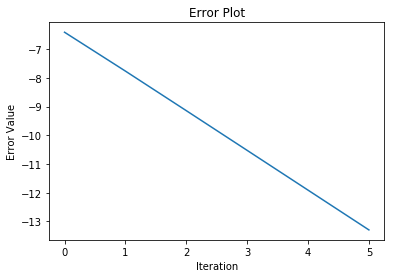

In [5]:
plt.plot(error)
plt.ylabel('Error Value')
plt.xlabel('Iteration')
plt.title('Error Plot')
plt.show()

This plot shows that the more iterations we do in an integral the less error there is between it and the actual answer. 

#p3
Logorithmic interpolations

#p4 The Mathematical definition of Curvature is any of a number of loosely related concepts in different areas of geometry. Intuitively, curvature is the amount by which a geometric object such as a surface deviates from being a flat plane, or a curve from being straight as in the case of a line, but this is defined in different ways depending on the context. 

In [6]:
#p5 - 8.15
x = [-2, -1, 0, 1, 2, 3, 4]
y = [-14, 0.5, 3.1, 0, -3, 0, 16]
xi = [i/100.0 for i in range(-200, 401, 1)]
cia = pyFi.lagrange_coef(x,y)
yia = pyFi.lagrange_eval(xi,x,cia)

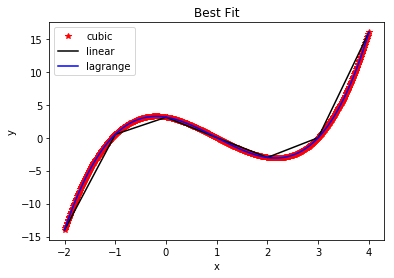

In [13]:
from scipy.interpolate import interp1d
myint =  interp1d(x, y,3)
ycubic = myint(xi)
myint =  interp1d(x, y)
ylinear = myint(xi)
plt.plot(xi,ycubic,'r*',xi,ylinear,'k',xi,yia,'b')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Best Fit')
plt.legend(['cubic','linear','lagrange'])
plt.show()

301
301


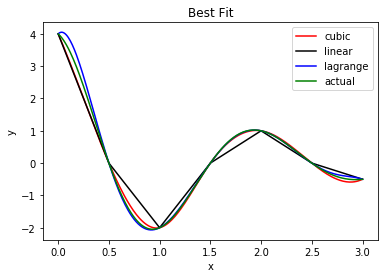

In [31]:
#p5 - 8.16
x = [0, 0.5, 1, 1.5, 2, 2.5, 3]
y = [4, 0.0, -2, 0.0, 1, 0.0, -0.5]
xi = [i/100.0 for i in range(0, 301, 1)]
yactual = [2**(2-a)*math.cos(math.pi*a) for a in xi]
print len(yactual)
print len(xi)
cia = pyFi.lagrange_coef(x,y)
yia = pyFi.lagrange_eval(xi,x,cia)
myint =  interp1d(x, y,3)
ycubic = myint(xi)
myint =  interp1d(x, y)
ylinear = myint(xi)
plt.plot(xi,ycubic,'r',xi,ylinear,'k',xi,yia,'b',xi,yactual,'g')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Best Fit')
plt.legend(['cubic','linear','lagrange','actual'])
plt.show()

In [ ]:
#p6 - 8.10
x = [0, 0.2, 0.4, 0.6 0.8, 1.0]
y = [0, 0.2, 0.4, 0.6 0.8, 1.0]
z = [[0, 0, 0, 0, 0, 0],
     [0, 0.0047, 0.0374, 0.1263, 0.2994, 0.5848]
